[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/labren/sonda-curadoria/blob/main/01_Analise_Exploratoria_Solarimetricos.ipynb)

# Análise Exploratória de Dados Solarimétricos
Este notebook realiza uma análise exploratória dos dados solarimétricos da rede SONDA.

## Importação das Bibliotecas
- **duckdb**: Banco de dados relacional que permite consultas SQL em arquivos locais
- **matplotlib.pyplot**: Biblioteca para criação de gráficos
- **seaborn**: Biblioteca para visualização de dados estatísticos

In [1]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

## Configuração Inicial
Definindo o caminho do arquivo parquet contendo os dados solarimétricos e o nome da tabela.

In [5]:
# Configurações para o nome do arquivo e da tabela
ARQUIVO_SOLARIMETRO = '~/sonda-translator/output/sonda-banco-dados/Solarimetrica.parquet'
NOME_DA_TABELA = 'solarimetrica'

In [16]:
# Instalar gdown para descargar el archivo de Google Drive
!python -m pip install -q -U gdown

import gdown

url = 'https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu'
gdown.download(url, ARQUIVO_SOLARIMETRO, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu
From (redirected): https://drive.google.com/uc?id=12__H_pE_JEEkehdCDdsjvNj08XdfhBiu&confirm=t&uuid=59b9e8ae-78cc-4440-8a8f-46b78bce566d
To: /home/helvecioneto/sonda-curadoria/Solarimetrica.parquet
100%|██████████| 4.09G/4.09G [06:04<00:00, 11.2MB/s]


'Solarimetrica.parquet'

## Conexão com o Banco de Dados
Criando uma conexão em memória com o DuckDB.

In [6]:
con = duckdb.connect(database=':memory:')

Importando os dados do arquivo Parquet para uma tabela no DuckDB.

In [7]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {NOME_DA_TABELA} AS \
            SELECT * FROM read_parquet('{ARQUIVO_SOLARIMETRO}')""")

# Visualização Inicial dos Dados
Exibindo as primeiras 5 linhas da tabela para verificar sua estrutura.

In [8]:
# Exibe as primeiras linhas da tabela
con.execute(f"SELECT * FROM {NOME_DA_TABELA} LIMIT 5").fetch_df()

,timestamp,acronym,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,2004-01-01 00:00:00,SBR,2004,1,0.0,3333.0,3333.0,3333.0,3333.0,3333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-01 00:01:00,SBR,2004,1,1.0,3333.0,3333.0,3333.0,3333.0,3333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-01-01 00:02:00,SBR,2004,1,2.0,3333.0,3333.0,3333.0,3333.0,3333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01 00:03:00,SBR,2004,1,3.0,3333.0,3333.0,3333.0,3333.0,3333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01 00:04:00,SBR,2004,1,4.0,3333.0,3333.0,3333.0,3333.0,3333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Faz uma consulta para obter dados da estação BRB para o período de 2018-12-01 a 2019-01-01
query = f"""
SELECT * FROM {NOME_DA_TABELA}
WHERE acronym = 'BRB' AND timestamp >= '2018-12-01' AND timestamp <= '2019-01-01'
"""
# Executa a consulta e armazena o resultado em um DataFrame
estacao_df = con.execute(query).fetch_df()
estacao_df

,timestamp,acronym,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,2018-12-01 00:00:00,BRB,2018,335,0.0,-0.365,0.048,-0.351,-0.526,-0.627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-01 00:01:00,BRB,2018,335,1.0,-0.447,0.087,-0.351,-0.526,-0.627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-01 00:02:00,BRB,2018,335,2.0,-0.514,0.044,-0.351,-0.526,-0.627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-01 00:03:00,BRB,2018,335,3.0,-0.625,0.087,-0.526,-0.701,-0.622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-01 00:04:00,BRB,2018,335,4.0,-0.698,0.022,-0.526,-0.701,-0.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2018-12-31 23:55:00,BRB,2018,365,1435.0,-0.701,0.000,-0.701,-0.701,-0.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44636,2018-12-31 23:56:00,BRB,2018,365,1436.0,-0.704,0.022,-0.701,-0.876,-0.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44637,2018-12-31 23:57:00,BRB,2018,365,1437.0,-0.710,0.038,-0.701,-0.876,-0.528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44638,2018-12-31 23:58:00,BRB,2018,365,1438.0,-0.701,0.000,-0.701,-0.701,-0.478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


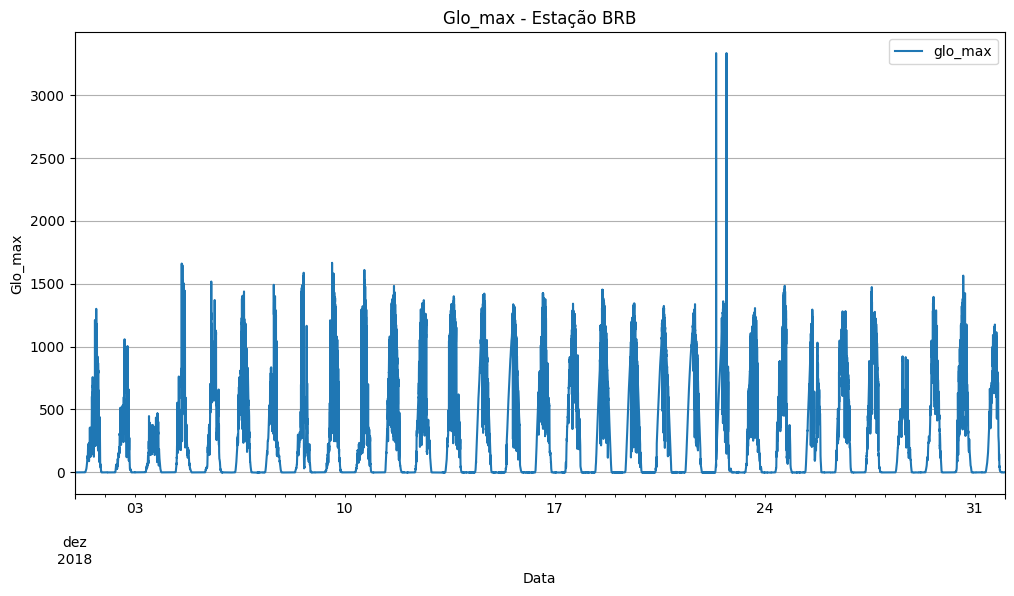

In [10]:
# Seta coluna timestamp como índice e plota variável glo_max
plot_estacao = estacao_df.set_index('timestamp').sort_index()
plot_estacao[['glo_max']].plot(title='Glo_max - Estação BRB', figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Glo_max')
plt.grid()
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()


def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

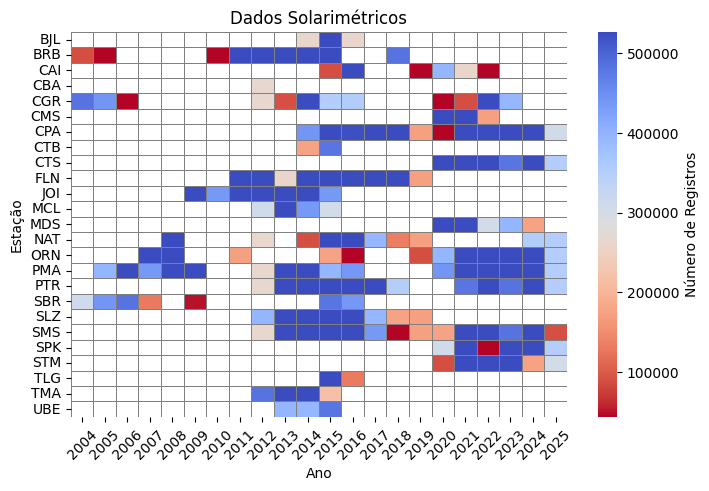

In [12]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos')

## Análise dos dados em quarentena

In [2]:
# Download quarentena.csv from Google Drive
url = 'https://drive.google.com/uc?id=1e6UCQ_oKKdnuDtGTFRbtNX9F1rHqi4YO'
gdown.download(url, 'quarentena.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e6UCQ_oKKdnuDtGTFRbtNX9F1rHqi4YO
To: /home/helvecioneto/sonda-curadoria/quarentena.csv
100%|██████████| 82.1k/82.1k [00:00<00:00, 757kB/s]


'quarentena.csv'

In [13]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('~/sonda-translator/output/sonda-quarentena/quarentena.csv')
quarentena_df

,qid,estacao,tipo,status,code,data_detecao,data_tratamento,problema,path
0,1,CMS,SD,Ruim,5,2025-08-22 14:32:23,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/CMS/Solarimetricos/CMS...
1,2,CMS,SD,Ruim,4,2025-08-22 14:32:23,NaN,progressão de timestamps não é monotônica cres...,output/sonda-quarentena/CMS/Solarimetricos/CMS...
2,3,CMS,SD,Ruim,5,2025-08-22 14:32:23,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/CMS/Solarimetricos/CMS...
3,4,CMS,SD,Ruim,4,2025-08-22 14:32:23,NaN,progressão de timestamps não é monotônica cres...,output/sonda-quarentena/CMS/Solarimetricos/CMS...
4,5,CMS,SD,Ruim,4,2025-08-22 14:32:23,NaN,progressão de timestamps não é monotônica cres...,output/sonda-quarentena/CMS/Solarimetricos/CMS...
...,...,...,...,...,...,...,...,...,...
208,209,ORN,SD,Ruim,5,2025-08-22 17:26:44,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/ORN/Solarimetricos/ORN...
209,210,ORN,SD,Ruim,5,2025-08-22 17:38:39,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/ORN/Solarimetricos/ORN...
210,211,NAT,SD,Ruim,5,2025-08-22 17:45:24,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/NAT/Solarimetricos/NAT...
211,212,NAT,SD,Ruim,5,2025-08-22 17:45:24,NaN,intervalo total de timestamps é menor que 8 ho...,output/sonda-quarentena/NAT/Solarimetricos/NAT...


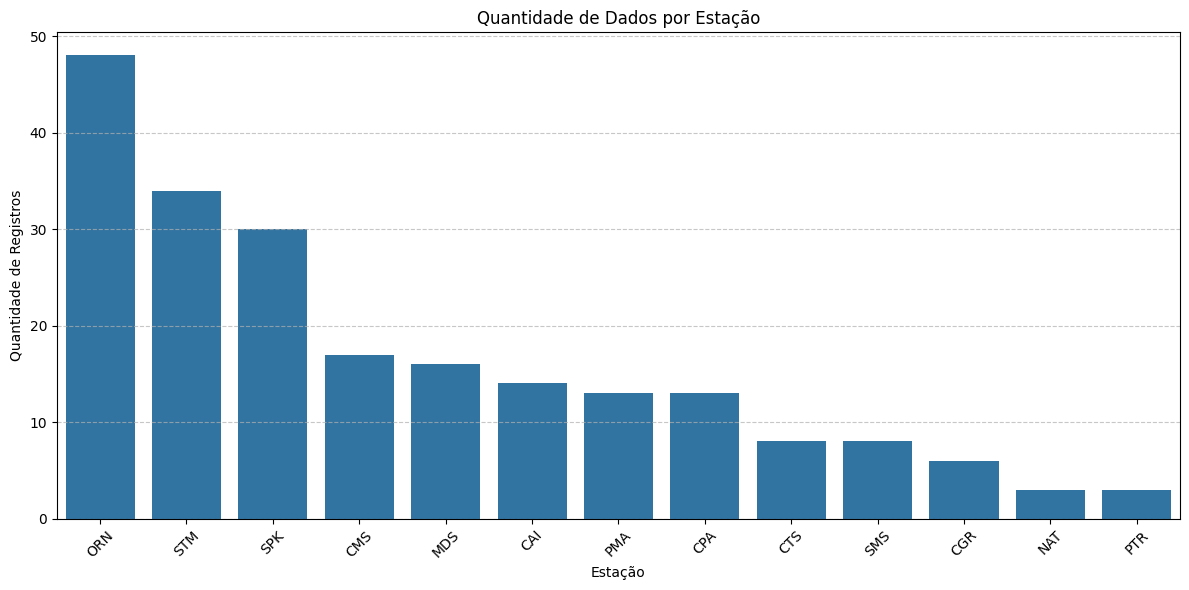

In [14]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
7      ORN        48
12     STM        34
11     SPK        30
2      CMS        17
5      MDS        16
0      CAI        14
8      PMA        13
3      CPA        13
4      CTS         8
10     SMS         8
1      CGR         6
6      NAT         3
9      PTR         3


In [16]:
# Faz uma contagem dos problemas encontrados usando string matching
from collections import Counter

# Definindo os tipos de problemas a serem contados
tipos = ['datas diferentes encontradas', 'não é possível realizar o teste temporal','mais de 50% dos valores de timestamp são nulos', 'progressão de timestamps não é monotônica crescente', 'intervalo total de timestamps é menor que 12 horas']

def contar_problemas(df, tipos):
    contagem = Counter()
    
    # Para cada tipo de problema, procura por strings que contenham essa substring
    for tipo in tipos:
        # Conta quantas linhas contêm este tipo de problema
        count = df['problema'].str.contains(tipo, na=False).sum()
        contagem[tipo] = count
    
    return contagem

# Contando os problemas encontrados
problemas_contados = contar_problemas(quarentena_df, tipos)

# Exibindo os resultados
print("Contagem de problemas encontrados:")
for problema, contagem in problemas_contados.items():
    print(f"{problema}: {contagem}")

Contagem de problemas encontrados:
datas diferentes encontradas: 0
não é possível realizar o teste temporal: 0
mais de 50% dos valores de timestamp são nulos: 0
progressão de timestamps não é monotônica crescente: 52
intervalo total de timestamps é menor que 12 horas: 0


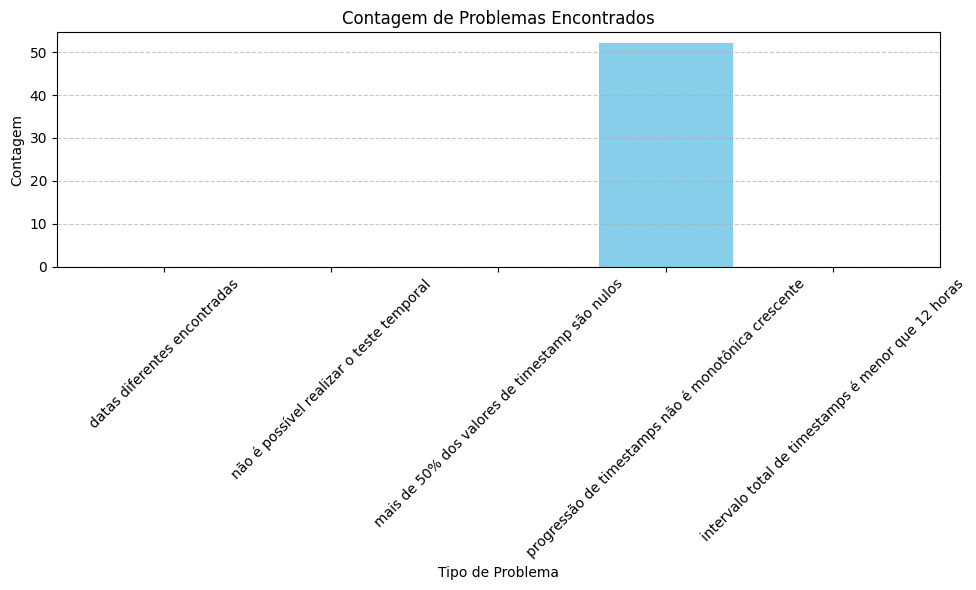

In [17]:
# Crie um plot de barras para visualizar a contagem de problemas
plt.figure(figsize=(10, 6))
plt.bar(problemas_contados.keys(), problemas_contados.values(), color='skyblue')
plt.title('Contagem de Problemas Encontrados')
plt.xlabel('Tipo de Problema')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()